# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
# Carregando os pacotes
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
# Carregando a base e criando as variáveis
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips = tips.sort_values(by='net_bill')

O R² do modelo é: 9.13%


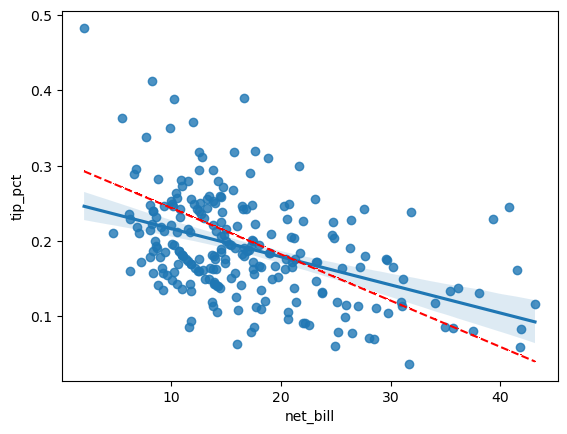

In [3]:
# Reproduzindo o modelo e criando o gráfico
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

# Calculando R²
print('O R² do modelo é: {:.2%}'.format(reg.rsquared))

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

O R² do modelo é: 20.17%


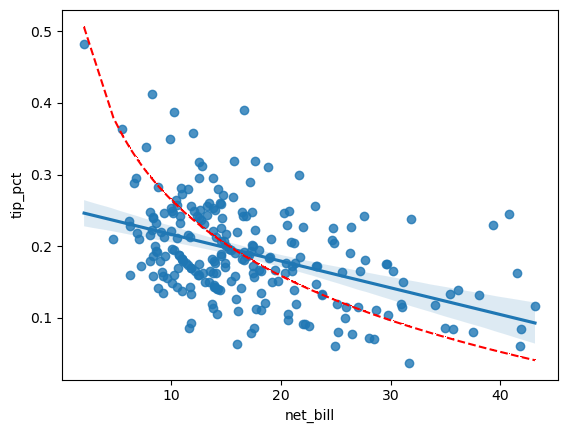

In [4]:
# Reproduzindo o modelo e criando o gráfico
reg = smf.ols('tip_pct ~ np.log(net_bill)', data = tips).fit()
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

# Encontrando R²
print('O R² do modelo é: {:.2%}'.format(reg.rsquared))

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

O R² do modelo é: 5.28%


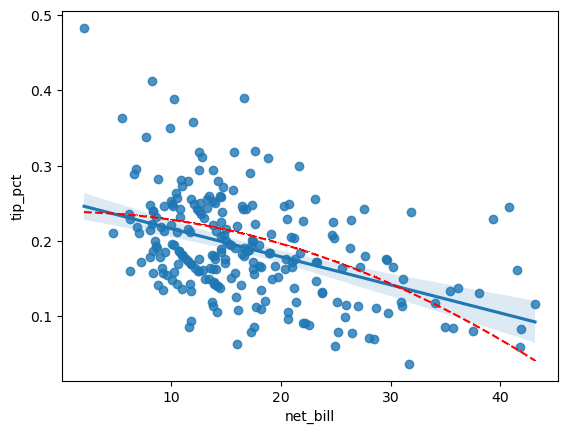

In [5]:
# Montando o modelo
reg = smf.ols('tip_pct ~ np.power(net_bill,2)', data = tips).fit()
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

# Encontrando R²
print('O R² do modelo é: {:.2%}'.format(reg.rsquared))

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

O R2 do modelo é 11.44%


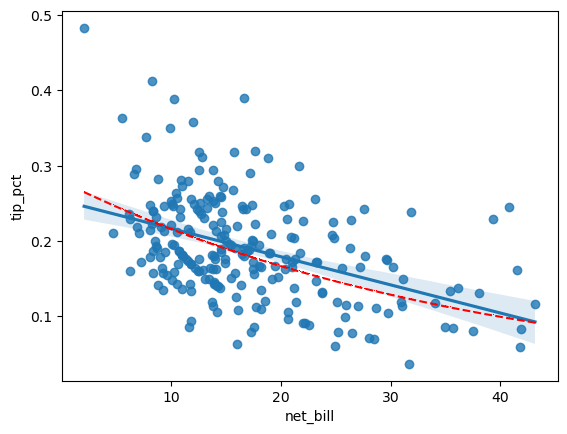

In [6]:
# Montando o modelo
reg = smf.ols('np.log(tip_pct) ~ net_bill', data = tips).fit()
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])
plt.plot(tips['net_bill'], np.exp(reg.fittedvalues), 'r,--')

# Encontrando R²
tips['pred_y'] = np.exp(reg.fittedvalues)
r2 = tips[['pred_y', 'tip_pct']].corr().iloc[0,1]**2
print("O R2 do modelo é {:.2%}".format(r2))

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

O R2 do modelo é 30.89%


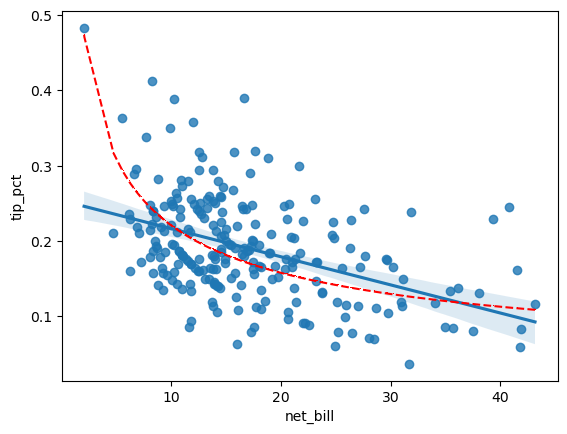

In [7]:
# Montando o modelo
reg = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])
plt.plot(tips['net_bill'], np.exp(reg.fittedvalues), 'r,--')

# Encontrando R²
tips['pred_y'] = np.exp(reg.fittedvalues)
r2 = tips[['pred_y', 'tip_pct']].corr().iloc[0,1]**2
print("O R2 do modelo é {:.2%}".format(r2))

###  6. qual modelo resultou no melhor ajuste?

#### O modelo que resultou no melhor ajuste foi no log do **tip_pct** em função do log de **net_bill**.